In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from scipy.stats import norm
import statistics

In [2]:
data = pd.read_csv("Obesity Survey (Responses).csv")

In [3]:
data.head()

,Timestamp,Gender,Email address,Age,Height,What is your height?( Numeric value in Feet and inches.EG:- 5.4),Weight,family_history_with_overweight,FAVC,FCVC,...,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI,NObeyesdad
0,4-19-2024 3:36:54,Male,arpanmahto2003@gmail.com,22.0,1.767840,5.80,64.0,no,no,3,...,Sometimes,no,4.00,no,6,8.0,no,Public_Transportation,20.478308,Normal_Weight
1,4-19-2024 3:52:20,Male,krishnakanty058@gmail.com,21.0,1.737360,5.70,80.0,yes,no,4,...,Sometimes,no,5.00,no,5,10.0,no,Public_Transportation,26.503935,Overweight_Level_I
2,4-19-2024 10:29:07,Male,adityam958@gmail.com,69.0,1.688592,5.54,69.0,yes,yes,1,...,Always,no,1.00,no,7,14.0,no,Walking,24.199123,Normal_Weight
3,4-19-2024 10:29:45,Male,btech15064.20@bitmesra.ac.in,22.0,1.737360,5.70,68.0,no,yes,1,...,Sometimes,yes,3.75,no,4,4.0,Sometimes,Automobile,22.528344,Normal_Weight
4,4-19-2024 10:30:14,Male,shivamkishor1234@gmail.com,21.0,1.737360,5.70,64.5,no,no,3,...,Sometimes,no,3.00,no,7,14.0,no,Bike,21.368797,Normal_Weight


In [4]:
ap=data.copy()

In [5]:
ap.head()

,Timestamp,Gender,Email address,Age,Height,What is your height?( Numeric value in Feet and inches.EG:- 5.4),Weight,family_history_with_overweight,FAVC,FCVC,...,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI,NObeyesdad
0,4-19-2024 3:36:54,Male,arpanmahto2003@gmail.com,22.0,1.767840,5.80,64.0,no,no,3,...,Sometimes,no,4.00,no,6,8.0,no,Public_Transportation,20.478308,Normal_Weight
1,4-19-2024 3:52:20,Male,krishnakanty058@gmail.com,21.0,1.737360,5.70,80.0,yes,no,4,...,Sometimes,no,5.00,no,5,10.0,no,Public_Transportation,26.503935,Overweight_Level_I
2,4-19-2024 10:29:07,Male,adityam958@gmail.com,69.0,1.688592,5.54,69.0,yes,yes,1,...,Always,no,1.00,no,7,14.0,no,Walking,24.199123,Normal_Weight
3,4-19-2024 10:29:45,Male,btech15064.20@bitmesra.ac.in,22.0,1.737360,5.70,68.0,no,yes,1,...,Sometimes,yes,3.75,no,4,4.0,Sometimes,Automobile,22.528344,Normal_Weight
4,4-19-2024 10:30:14,Male,shivamkishor1234@gmail.com,21.0,1.737360,5.70,64.5,no,no,3,...,Sometimes,no,3.00,no,7,14.0,no,Bike,21.368797,Normal_Weight


In [6]:
ap.shape

(142, 21)

In [7]:
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Timestamp                                                         142 non-null    object 
 1   Gender                                                            142 non-null    object 
 2   Email address                                                     82 non-null     object 
 3   Age                                                               142 non-null    float64
 4   Height                                                            142 non-null    float64
 5   What is your height?( Numeric value in Feet and inches.EG:- 5.4)  142 non-null    float64
 6   Weight                                                            142 non-null    float64
 7   family_history_with_overweight     

In [8]:
ap.isnull().sum()

Timestamp                                                            0
Gender                                                               0
Email address                                                       60
Age                                                                  0
Height                                                               0
What is your height?( Numeric value in Feet and inches.EG:- 5.4)     0
Weight                                                               0
family_history_with_overweight                                       0
FAVC                                                                 0
FCVC                                                                 0
NCP                                                                  0
CAEC                                                                 0
SMOKE                                                                0
CH2O                                                                 0
SCC   

## Removing the unnecessary columns that are of no use

In [9]:
ap=ap.drop(columns=['Timestamp','Email address','What is your height?( Numeric value in Feet and inches.EG:- 5.4)','BMI'])

In [10]:
ap.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,22.0,1.767840,64.0,no,no,3,4,Sometimes,no,4.00,no,6,8.0,no,Public_Transportation,Normal_Weight
1,Male,21.0,1.737360,80.0,yes,no,4,3,Sometimes,no,5.00,no,5,10.0,no,Public_Transportation,Overweight_Level_I
2,Male,69.0,1.688592,69.0,yes,yes,1,4,Always,no,1.00,no,7,14.0,no,Walking,Normal_Weight
3,Male,22.0,1.737360,68.0,no,yes,1,2,Sometimes,yes,3.75,no,4,4.0,Sometimes,Automobile,Normal_Weight
4,Male,21.0,1.737360,64.5,no,no,3,4,Sometimes,no,3.00,no,7,14.0,no,Bike,Normal_Weight


In [11]:
ap.shape

(142, 17)

In [12]:
ap.duplicated().sum()

0

In [13]:
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          142 non-null    object 
 1   Age                             142 non-null    float64
 2   Height                          142 non-null    float64
 3   Weight                          142 non-null    float64
 4   family_history_with_overweight  142 non-null    object 
 5   FAVC                            142 non-null    object 
 6   FCVC                            142 non-null    int64  
 7   NCP                             142 non-null    int64  
 8   CAEC                            142 non-null    object 
 9   SMOKE                           142 non-null    object 
 10  CH2O                            142 non-null    float64
 11  SCC                             142 non-null    object 
 12  FAF                             142 

In [14]:
ap['Age'].value_counts().head(40)

Age
20.0    34
21.0    33
22.0    25
19.0    17
18.0    16
23.0    11
26.0     2
69.0     1
24.0     1
17.5     1
25.0     1
Name: count, dtype: int64

## Graphical Analysis of the data

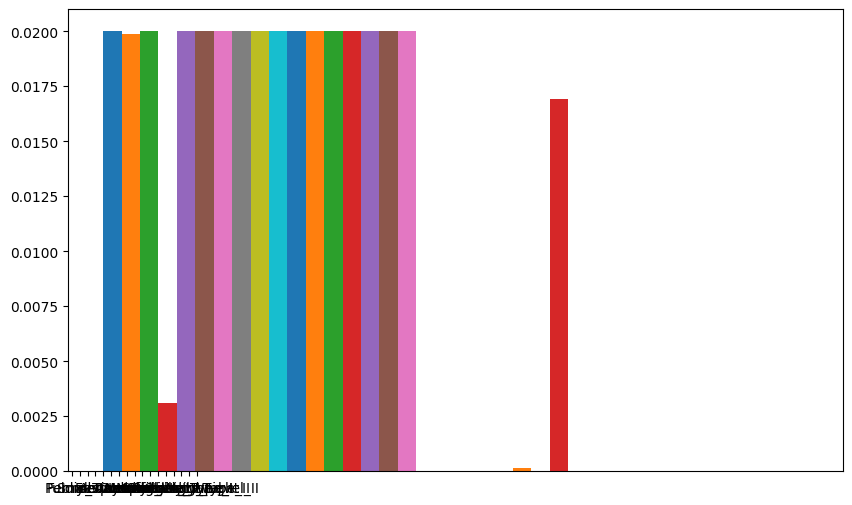

In [15]:
plt.figure(figsize=(10, 6)) 
plt.hist(ap,bins=2,density=True,alpha=1)
plt.show()

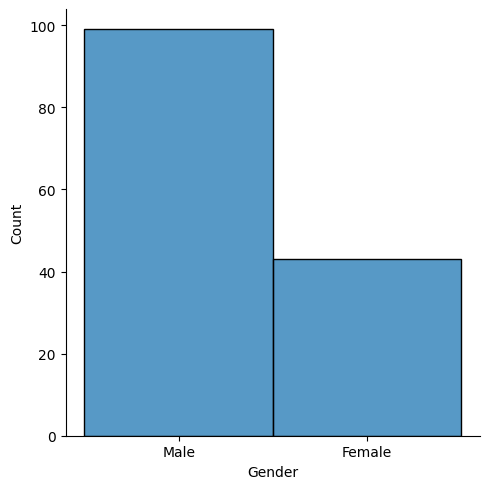

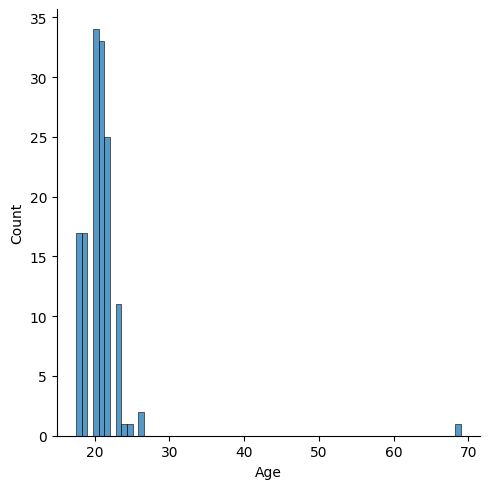

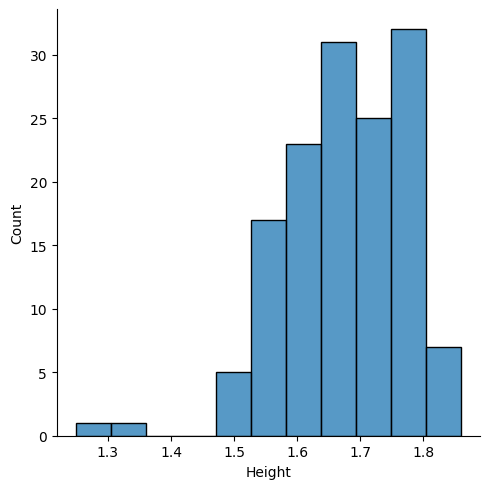

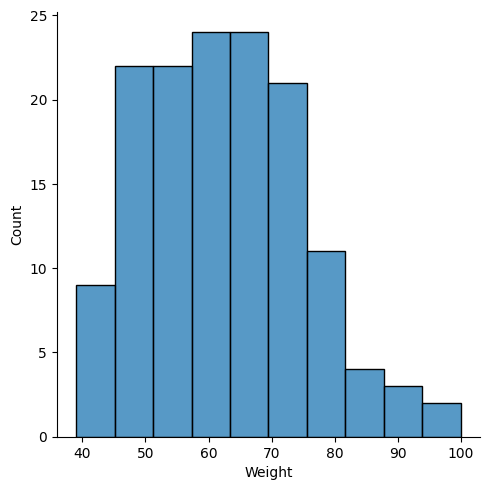

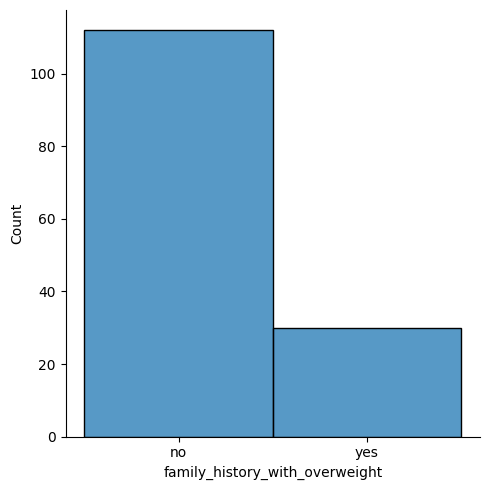

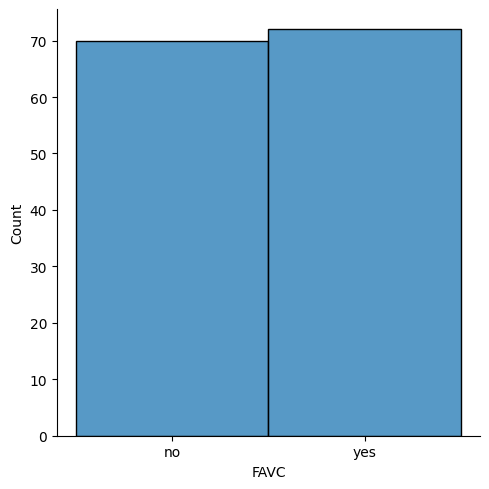

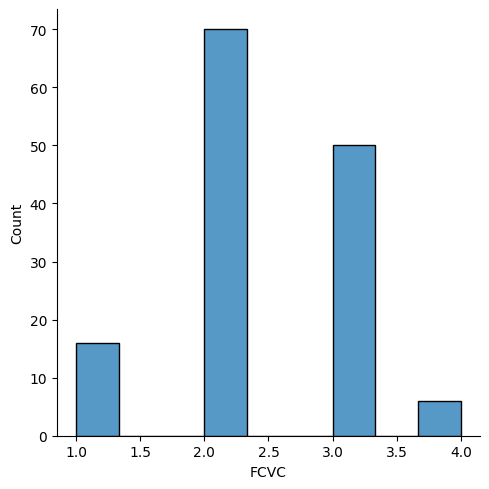

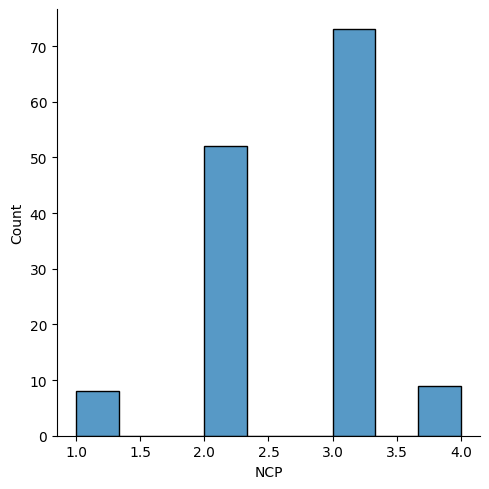

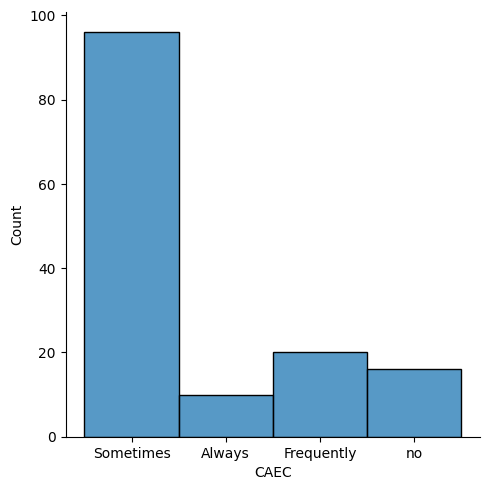

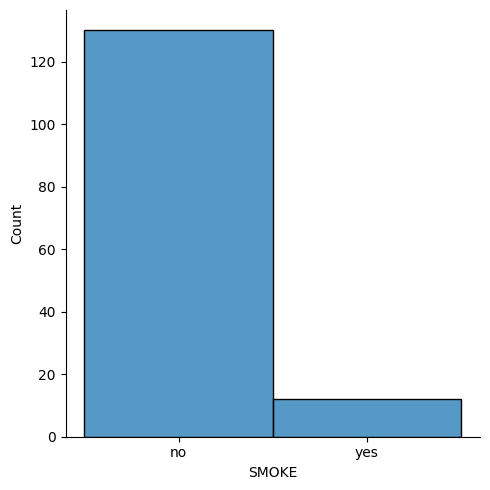

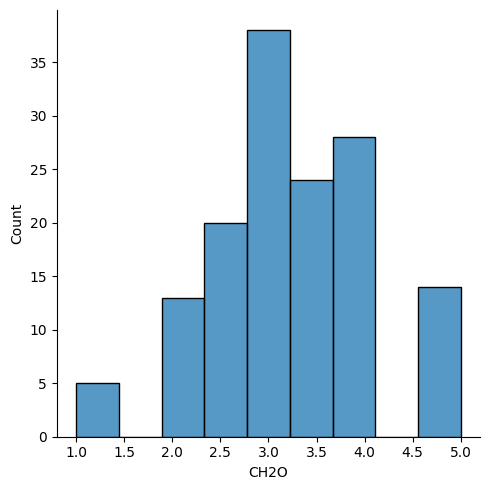

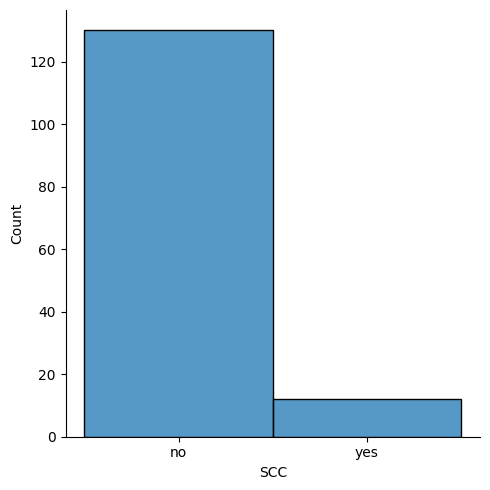

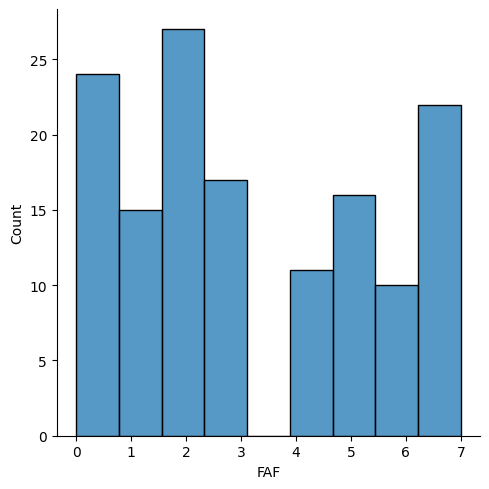

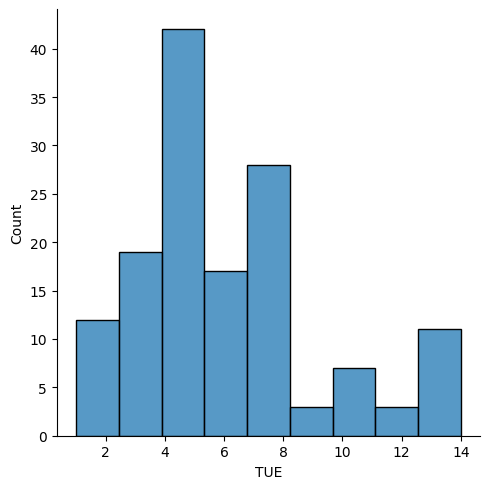

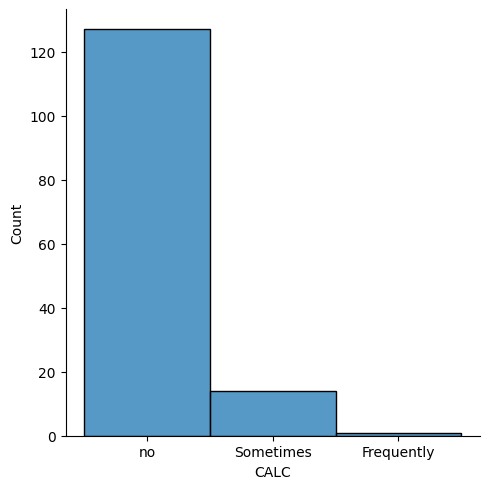

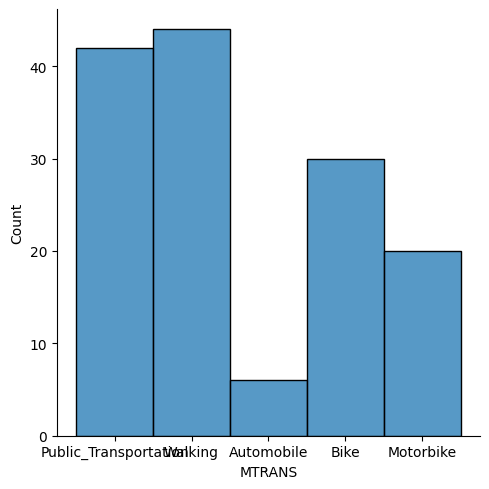

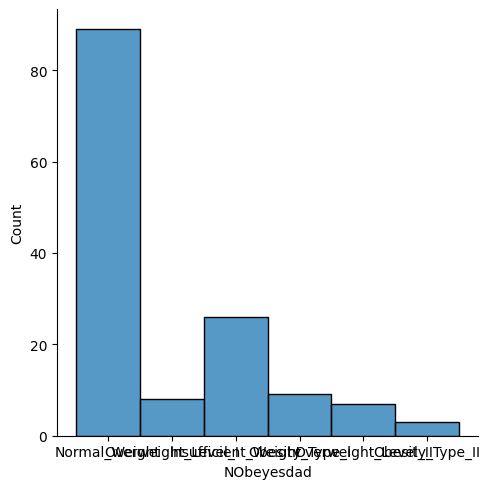

In [16]:
for columns in ap:
 sns.displot(x=columns,data=ap)

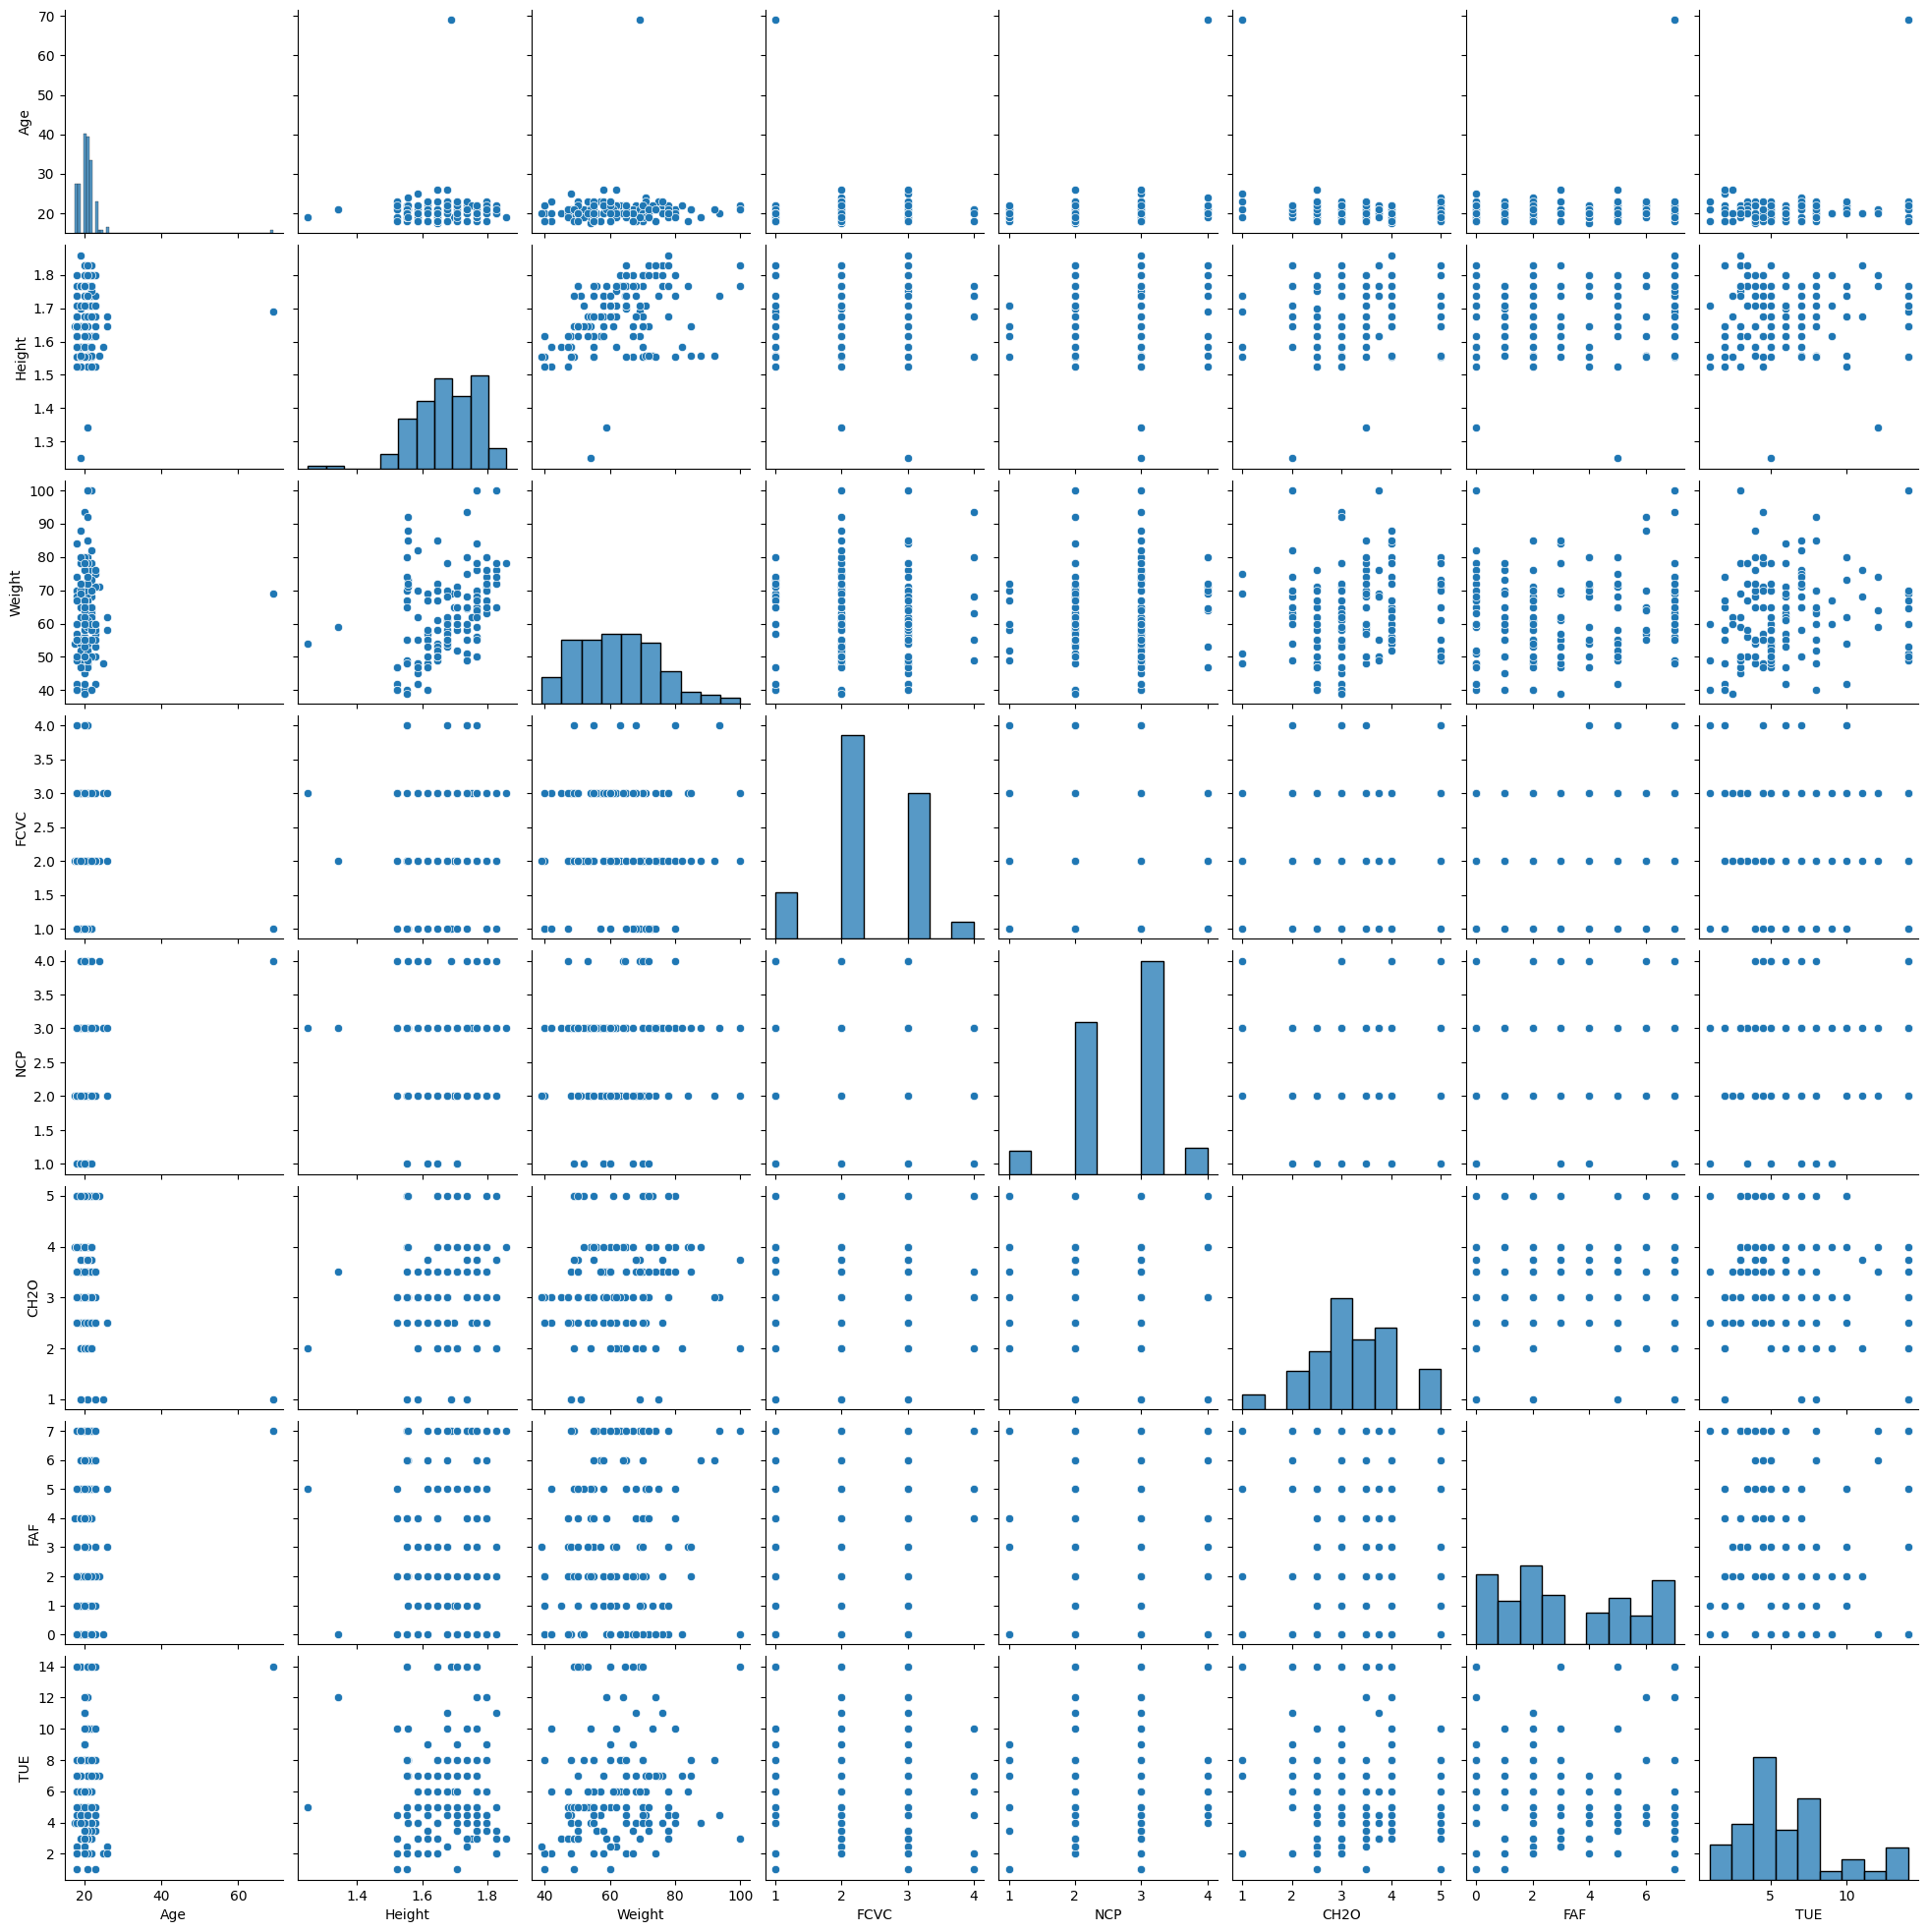

In [17]:
sns.pairplot(ap)

# Univariate Analysis

In [18]:
ap['NObeyesdad'].value_counts(normalize='True')

NObeyesdad
Normal_Weight          0.626761
Insufficient_Weight    0.183099
Obesity_Type_I         0.063380
Overweight_Level_I     0.056338
Overweight_Level_II    0.049296
Obesity_Type_II        0.021127
Name: proportion, dtype: float64

<Axes: xlabel='NObeyesdad'>

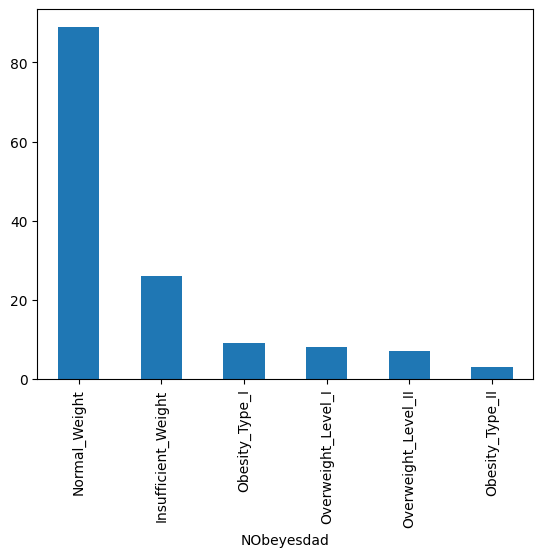

In [19]:
ap['NObeyesdad'].value_counts().plot.bar()

<Axes: xlabel='NObeyesdad'>

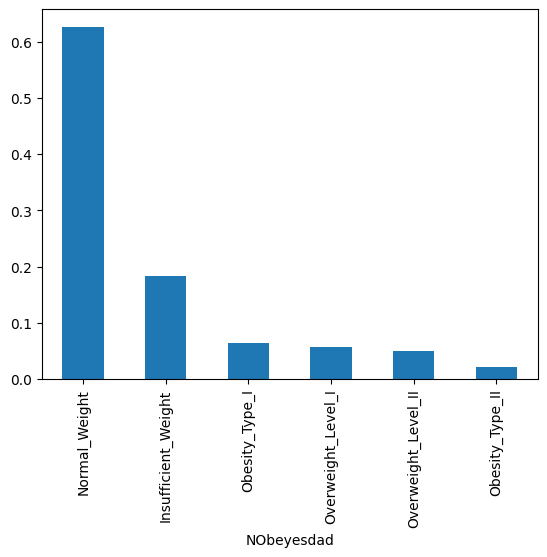

In [20]:
ap['NObeyesdad'].value_counts(normalize='True').plot.bar()

<Axes: xlabel='NObeyesdad', ylabel='count'>

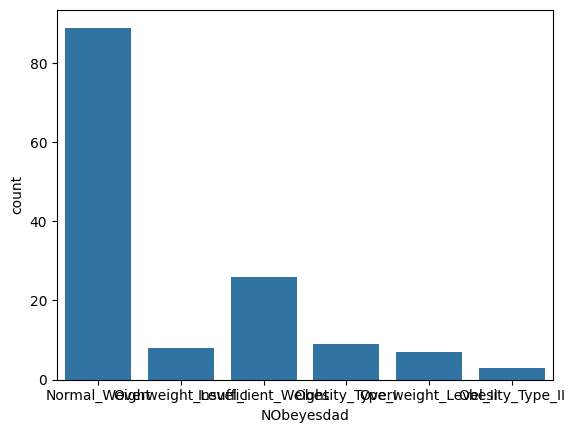

In [21]:
sns.countplot(x='NObeyesdad',data=ap)

# Independent Variable (Categorical) using seaborn

<Axes: xlabel='MTRANS', ylabel='count'>

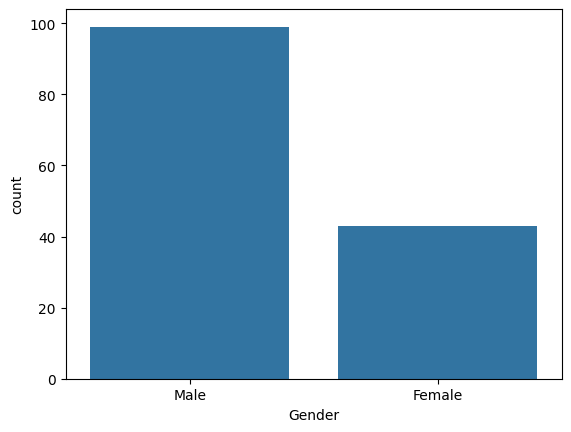

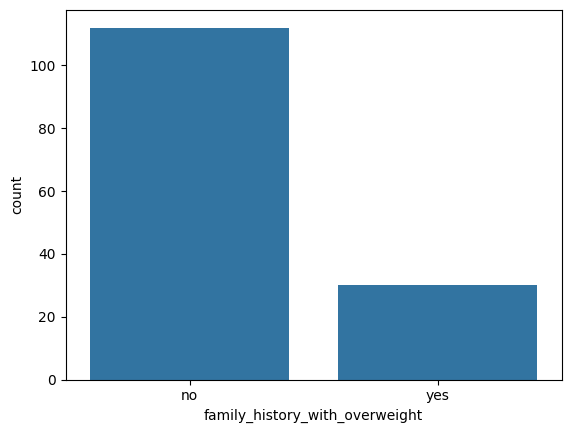

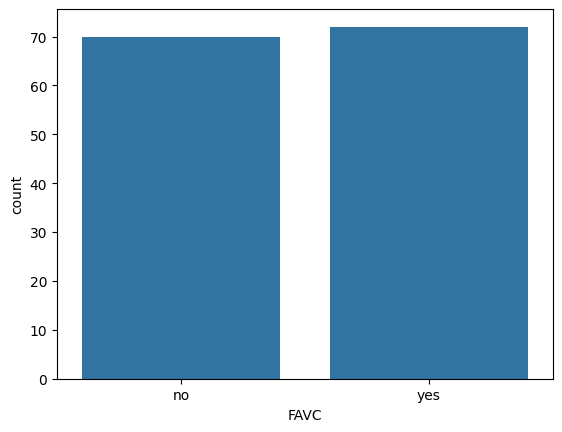

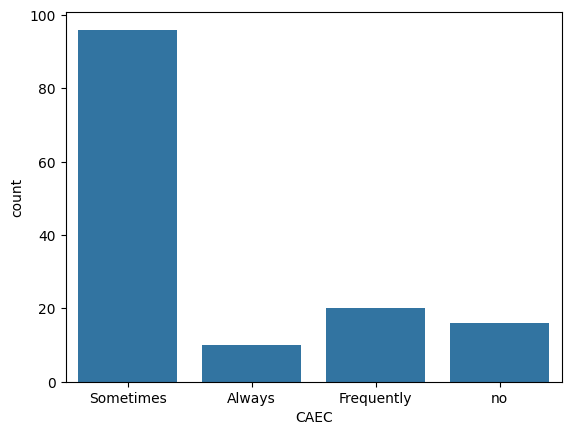

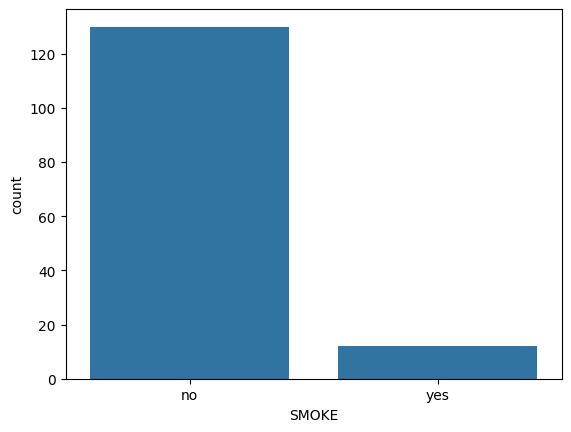

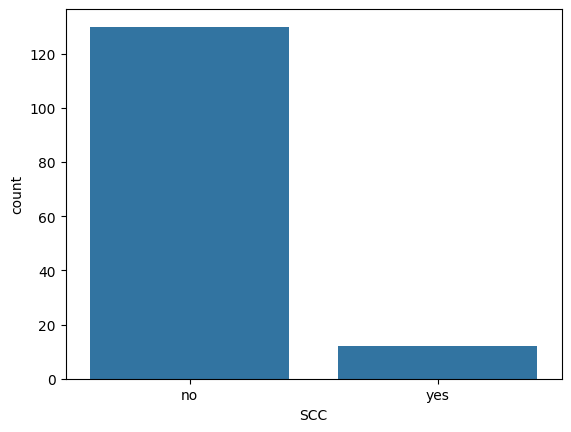

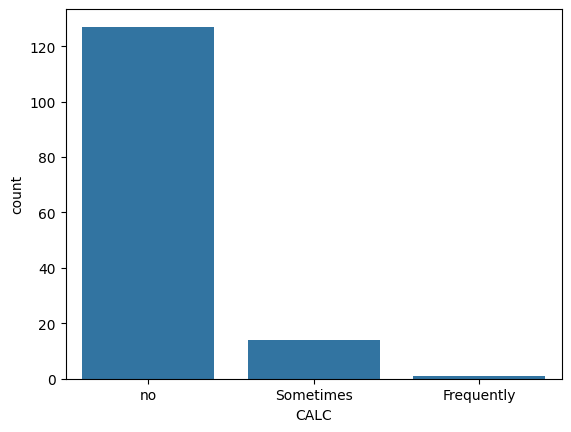

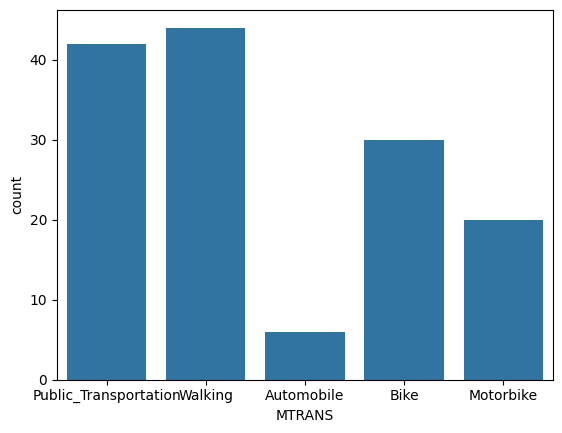

In [22]:
plt.figure(1)
plt.subplot(111)
sns.countplot(x='Gender',data=ap)
plt.figure(2)
plt.subplot(111)
sns.countplot(x='family_history_with_overweight',data=ap)
plt.figure(3)
plt.subplot(111)
sns.countplot(x='FAVC',data=ap)
plt.figure(4)
plt.subplot(111)
sns.countplot(x='CAEC',data=ap)
plt.figure(5)
plt.subplot(111)
sns.countplot(x='SMOKE',data=ap)
plt.figure(6)
plt.subplot(111)
sns.countplot(x='SCC',data=ap)
plt.figure(7)
plt.subplot(111)
sns.countplot(x='CALC',data=ap)
plt.figure(8)
plt.subplot(111)
sns.countplot(x='MTRANS',data=ap)

## Bivariate Analysis

### continuous vs Categorical

<Axes: xlabel='NObeyesdad', ylabel='Age'>

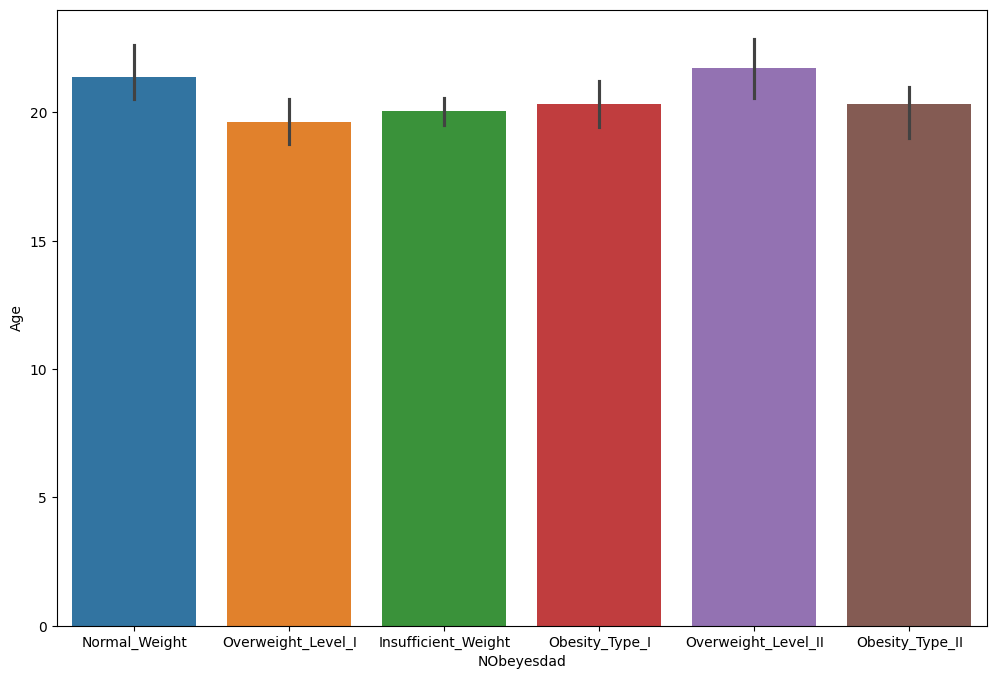

In [23]:
plt.figure(figsize=(12,8))
sns.barplot(data=ap,y='Age',x='NObeyesdad',hue='NObeyesdad')

In [24]:
ap.groupby(['Age', 'NObeyesdad']).size()

Age   NObeyesdad         
17.5  Normal_Weight           1
18.0  Insufficient_Weight     5
      Normal_Weight           8
      Obesity_Type_I          1
      Overweight_Level_I      2
19.0  Insufficient_Weight     3
      Normal_Weight           8
      Obesity_Type_I          2
      Obesity_Type_II         1
      Overweight_Level_I      2
      Overweight_Level_II     1
20.0  Insufficient_Weight     8
      Normal_Weight          24
      Obesity_Type_I          1
      Overweight_Level_I      1
21.0  Insufficient_Weight     7
      Normal_Weight          17
      Obesity_Type_I          3
      Obesity_Type_II         2
      Overweight_Level_I      3
      Overweight_Level_II     1
22.0  Insufficient_Weight     2
      Normal_Weight          17
      Obesity_Type_I          2
      Overweight_Level_II     4
23.0  Insufficient_Weight     1
      Normal_Weight          10
24.0  Overweight_Level_II     1
25.0  Normal_Weight           1
26.0  Normal_Weight           2
69.0  Normal_W

<Axes: xlabel='NObeyesdad', ylabel='Weight'>

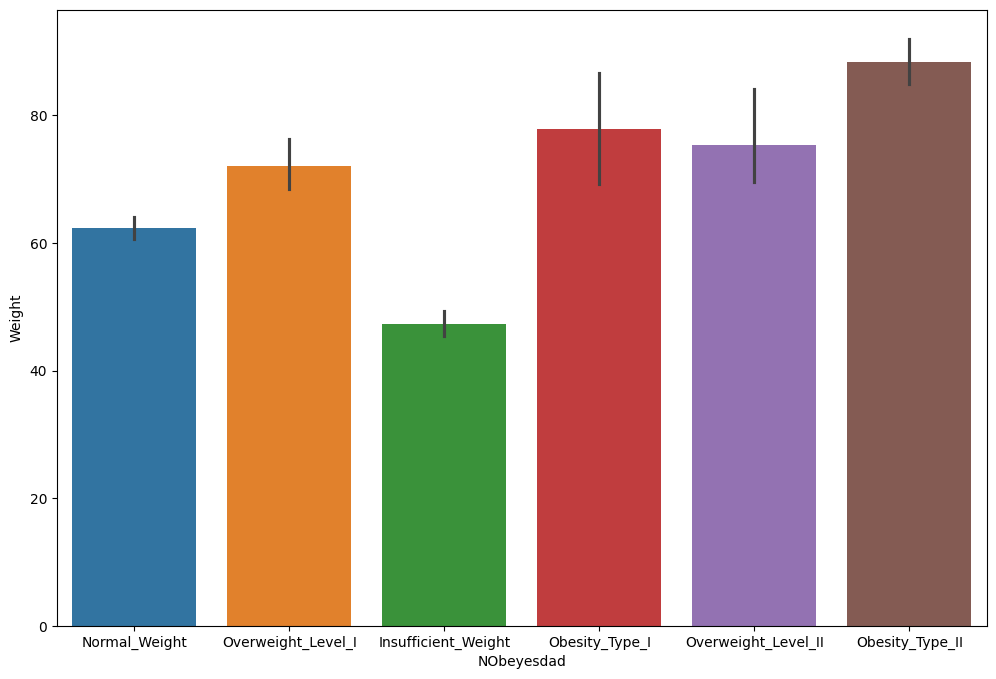

In [25]:
plt.figure(figsize=(12,8))
sns.barplot(data=ap,y='Weight',x='NObeyesdad',hue='NObeyesdad')

<Axes: xlabel='NObeyesdad', ylabel='Height'>

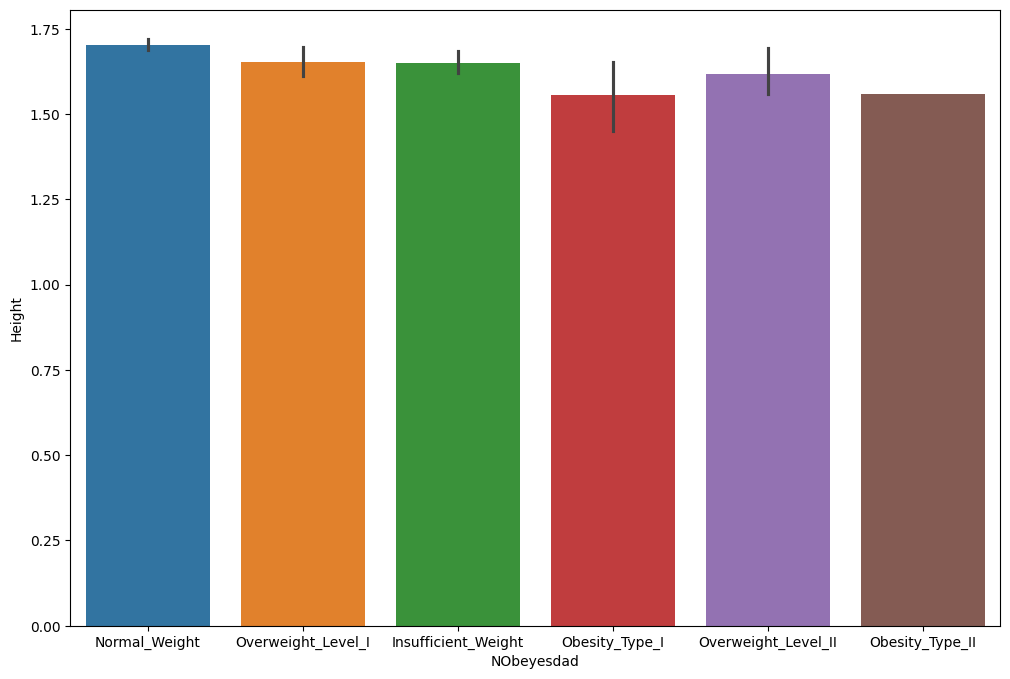

In [26]:
plt.figure(figsize=(12,8))
sns.barplot(data=ap,y='Height',x='NObeyesdad',hue='NObeyesdad')

<Axes: xlabel='NObeyesdad', ylabel='FCVC'>

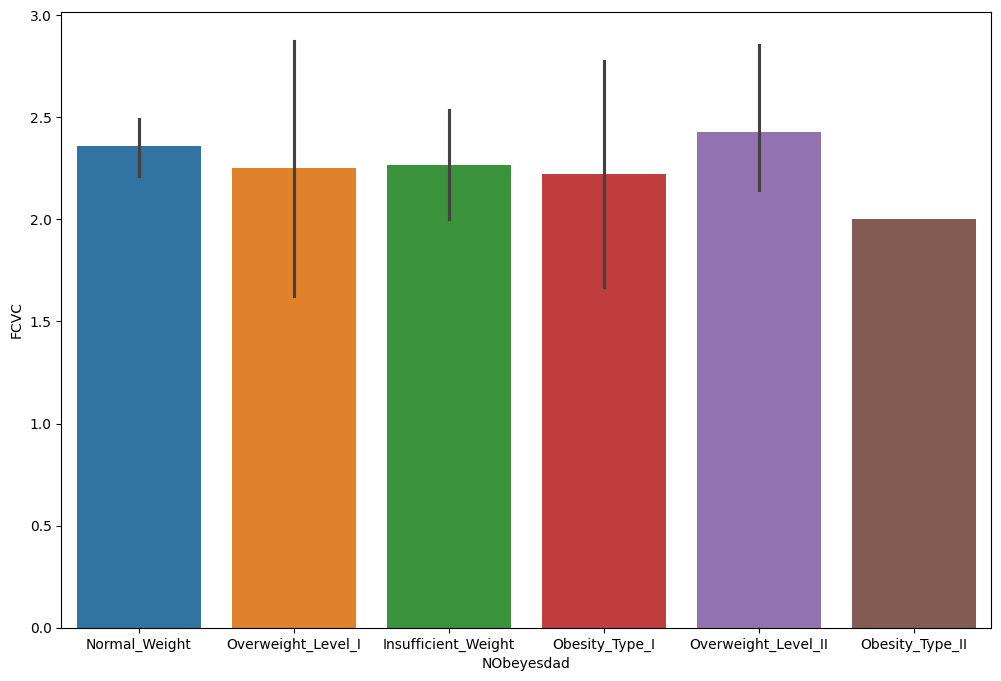

In [27]:
plt.figure(figsize=(12,8))
sns.barplot(data=ap,y='FCVC',x='NObeyesdad',hue='NObeyesdad')

<Axes: xlabel='NObeyesdad', ylabel='NCP'>

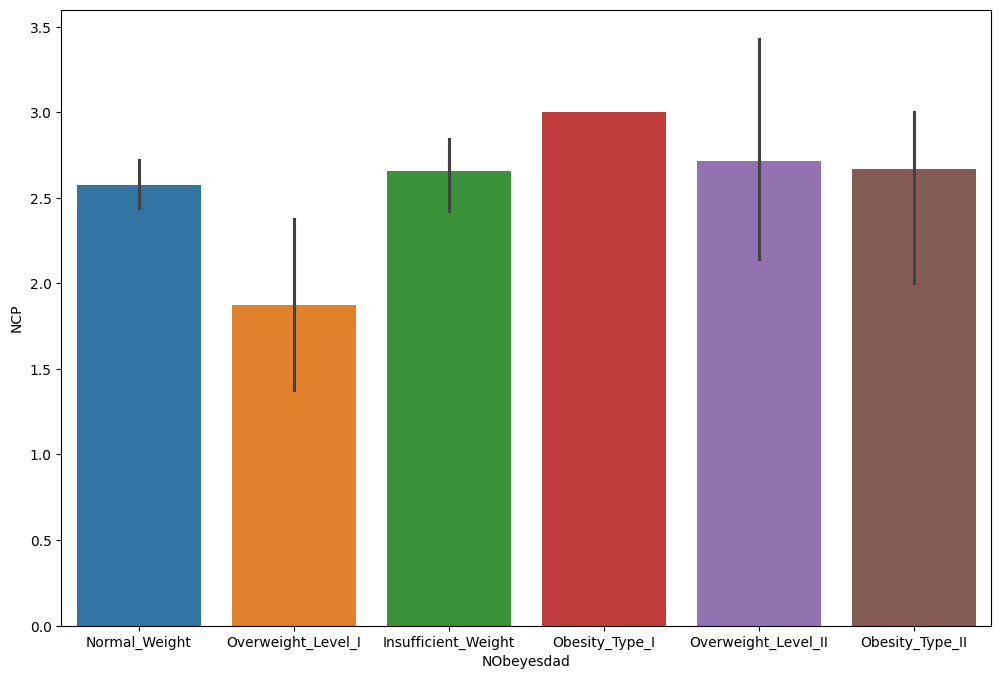

In [28]:
plt.figure(figsize=(12,8))
sns.barplot(data=ap,y='NCP',x='NObeyesdad',hue='NObeyesdad')

<Axes: xlabel='NObeyesdad', ylabel='CH2O'>

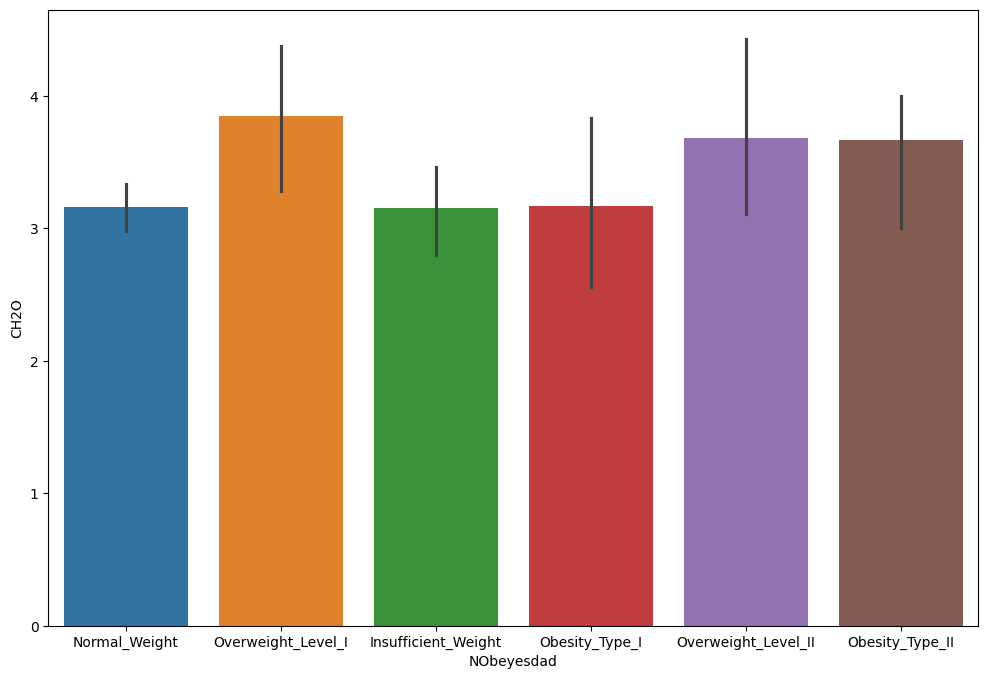

In [29]:
plt.figure(figsize=(12,8))
sns.barplot(data=ap,y='CH2O',x='NObeyesdad',hue='NObeyesdad')

<Axes: xlabel='NObeyesdad', ylabel='Weight'>

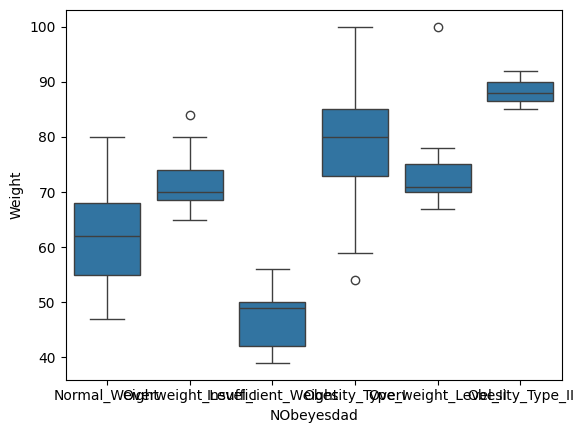

In [30]:
sns.boxplot(data=ap,y='Weight',x='NObeyesdad')

# categorical vs Categorical

<Axes: xlabel='Gender', ylabel='count'>

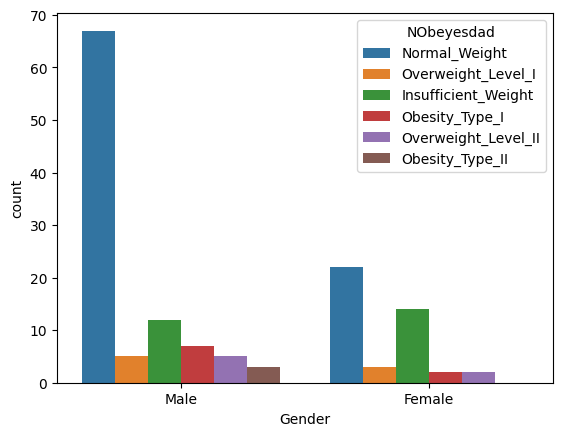

In [31]:
sns.countplot(data=ap,x='Gender',hue='NObeyesdad')
#if we want to stack this then we have to use crosstab and heatmap

<Axes: xlabel='family_history_with_overweight', ylabel='count'>

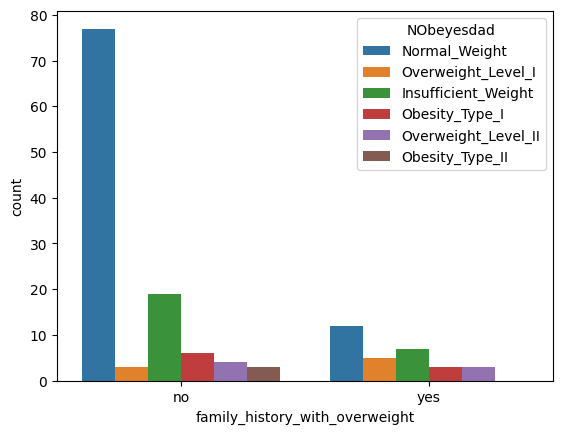

In [32]:
sns.countplot(data=ap,x='family_history_with_overweight',hue='NObeyesdad')

<Axes: xlabel='FAVC', ylabel='count'>

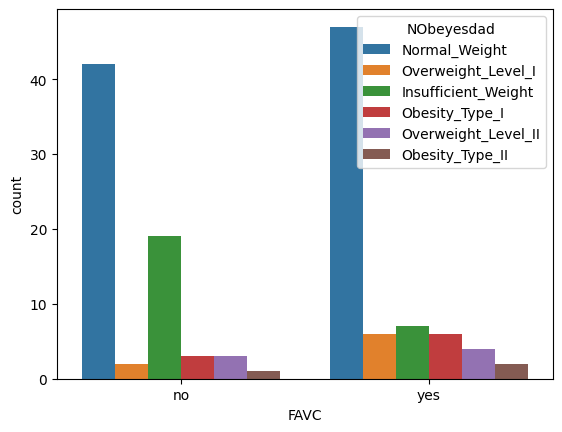

In [33]:
sns.countplot(data=ap,x='FAVC',hue='NObeyesdad')

<Axes: xlabel='CAEC', ylabel='count'>

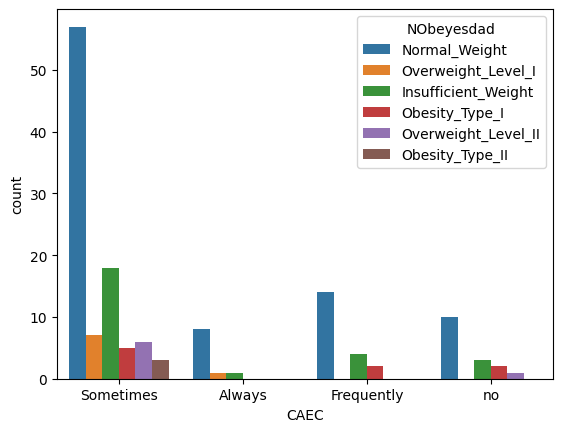

In [34]:
sns.countplot(data=ap,x='CAEC',hue='NObeyesdad')

<Axes: xlabel='SMOKE', ylabel='count'>

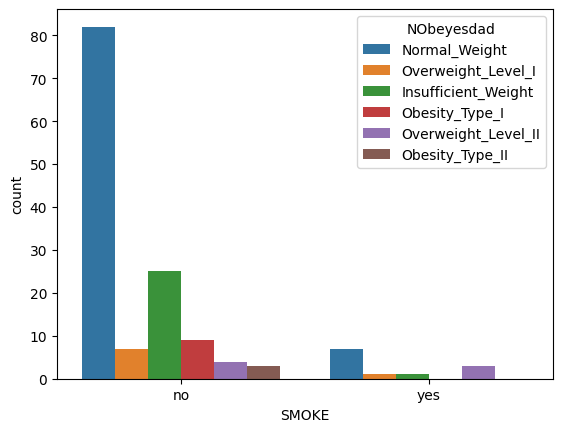

In [35]:
sns.countplot(data=ap,x='SMOKE',hue='NObeyesdad')

<Axes: xlabel='SCC', ylabel='count'>

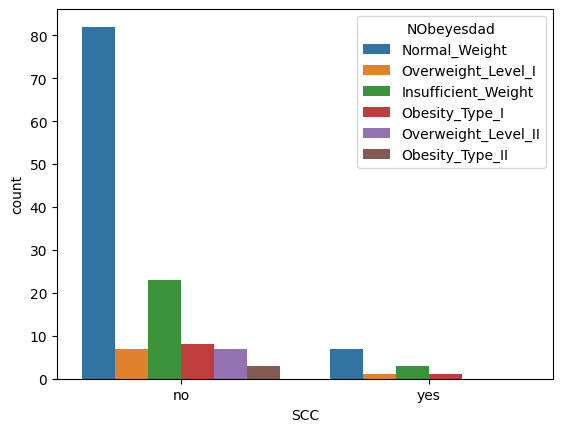

In [36]:
sns.countplot(data=ap,x='SCC',hue='NObeyesdad')

<Axes: xlabel='CALC', ylabel='count'>

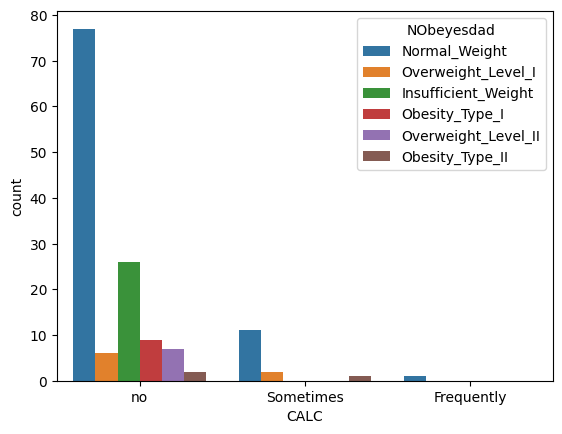

In [37]:
sns.countplot(data=ap,x='CALC',hue='NObeyesdad')

<Axes: xlabel='MTRANS', ylabel='count'>

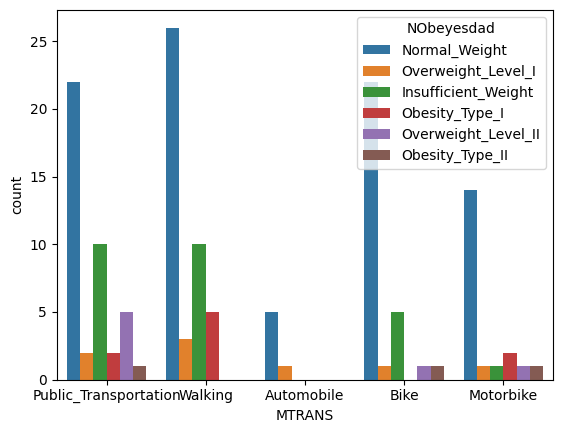

In [38]:
sns.countplot(data=ap,x='MTRANS',hue='NObeyesdad')

In [39]:
ap['Gender'].value_counts()

Gender
Male      99
Female    43
Name: count, dtype: int64

In [40]:
label_encode=LabelEncoder()
bbb=label_encode.fit_transform(ap['Gender'])
print(bbb)
ap['Gender']=bbb

[1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0
 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0]


In [41]:
ap['Gender'].value_counts()

Gender
1    99
0    43
Name: count, dtype: int64

In [42]:
ap['family_history_with_overweight'].value_counts()

family_history_with_overweight
no     112
yes     30
Name: count, dtype: int64

In [43]:
bbb=label_encode.fit_transform(ap['family_history_with_overweight'])
print(bbb)
ap['family_history_with_overweight']=bbb
ap['family_history_with_overweight'].value_counts()

[0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0]


family_history_with_overweight
0    112
1     30
Name: count, dtype: int64

In [44]:
ap['FAVC'].value_counts()

FAVC
yes    72
no     70
Name: count, dtype: int64

In [45]:
bbb=label_encode.fit_transform(ap['FAVC'])
print(bbb)
ap['FAVC']=bbb
ap['FAVC'].value_counts()

[0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0
 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1]


FAVC
1    72
0    70
Name: count, dtype: int64

In [46]:
ap['CAEC'].value_counts()

CAEC
Sometimes     96
Frequently    20
no            16
Always        10
Name: count, dtype: int64

In [47]:
bbb=label_encode.fit_transform(ap['CAEC'])
print(bbb)
ap['CAEC']=bbb
ap['CAEC'].value_counts()

[2 2 0 2 2 2 2 2 1 2 2 2 0 2 2 2 1 1 2 2 2 2 3 2 2 2 1 2 2 0 2 2 3 2 2 2 3
 1 2 2 3 2 2 1 3 2 2 2 0 2 2 1 1 2 2 3 2 2 2 3 2 2 3 3 2 2 1 2 1 1 2 2 0 2
 1 1 2 0 2 2 1 2 2 1 3 2 2 2 2 2 2 1 2 2 2 2 2 2 2 0 0 2 2 1 1 2 2 2 2 2 2
 1 2 2 2 2 3 3 2 2 2 2 2 2 2 3 0 3 3 2 2 2 2 3 0 2 2 2 2 2 2 1]


CAEC
2    96
1    20
3    16
0    10
Name: count, dtype: int64

In [48]:

ap['SMOKE'].value_counts()

SMOKE
no     130
yes     12
Name: count, dtype: int64

In [49]:
bbb=label_encode.fit_transform(ap['SMOKE'])
print(bbb)
ap['SMOKE']=bbb
ap['SMOKE'].value_counts()

[0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


SMOKE
0    130
1     12
Name: count, dtype: int64

In [50]:
ap['SCC'].value_counts()

SCC
no     130
yes     12
Name: count, dtype: int64

In [51]:
bbb=label_encode.fit_transform(ap['SCC'])
print(bbb)
ap['SCC']=bbb
ap['SCC'].value_counts()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0]


SCC
0    130
1     12
Name: count, dtype: int64

In [52]:
ap['CALC'].value_counts()

CALC
no            127
Sometimes      14
Frequently      1
Name: count, dtype: int64

In [53]:
bbb=label_encode.fit_transform(ap['CALC'])
print(bbb)
ap['CALC']=bbb
ap['CALC'].value_counts()

[2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 1 1 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


CALC
2    127
1     14
0      1
Name: count, dtype: int64

In [54]:
ap['MTRANS'].value_counts()

MTRANS
Walking                  44
Public_Transportation    42
Bike                     30
Motorbike                20
Automobile                6
Name: count, dtype: int64

In [55]:
bbb=label_encode.fit_transform(ap['MTRANS'])
print(bbb)
ap['MTRANS']=bbb
ap['MTRANS'].value_counts()

[3 3 4 0 1 4 1 3 4 1 4 2 3 3 1 1 2 3 2 3 4 3 4 2 1 3 4 2 3 2 1 4 3 3 3 3 2
 2 2 3 1 2 0 1 4 4 1 2 3 3 3 3 4 3 4 4 4 4 4 3 2 4 1 0 4 4 3 4 1 4 1 1 0 1
 3 1 4 4 1 1 3 3 3 2 1 1 4 2 4 3 4 1 4 4 4 2 4 2 4 2 3 4 4 4 0 4 2 1 4 3 3
 1 2 1 3 4 3 3 3 4 0 4 1 3 3 1 4 1 1 3 3 3 1 2 4 4 3 1 4 4 3 3]


MTRANS
4    44
3    42
1    30
2    20
0     6
Name: count, dtype: int64

In [56]:
ap['NObeyesdad'].value_counts()

NObeyesdad
Normal_Weight          89
Insufficient_Weight    26
Obesity_Type_I          9
Overweight_Level_I      8
Overweight_Level_II     7
Obesity_Type_II         3
Name: count, dtype: int64

In [57]:
bbb=label_encode.fit_transform(ap['NObeyesdad'])
print(bbb)
ap['NObeyesdad']=bbb
ap['NObeyesdad'].value_counts()

[1 4 1 1 1 1 1 1 0 1 2 5 1 1 1 1 1 1 1 5 1 5 2 4 5 4 1 3 5 1 1 0 5 1 2 0 2
 1 1 1 1 1 1 1 1 0 3 1 1 1 1 1 1 1 1 1 2 0 2 1 0 0 1 1 4 1 1 0 1 2 1 1 4 1
 0 0 4 1 1 1 1 3 0 1 1 4 1 1 1 1 4 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 5 2]


NObeyesdad
1    89
0    26
2     9
4     8
5     7
3     3
Name: count, dtype: int64

<Axes: >

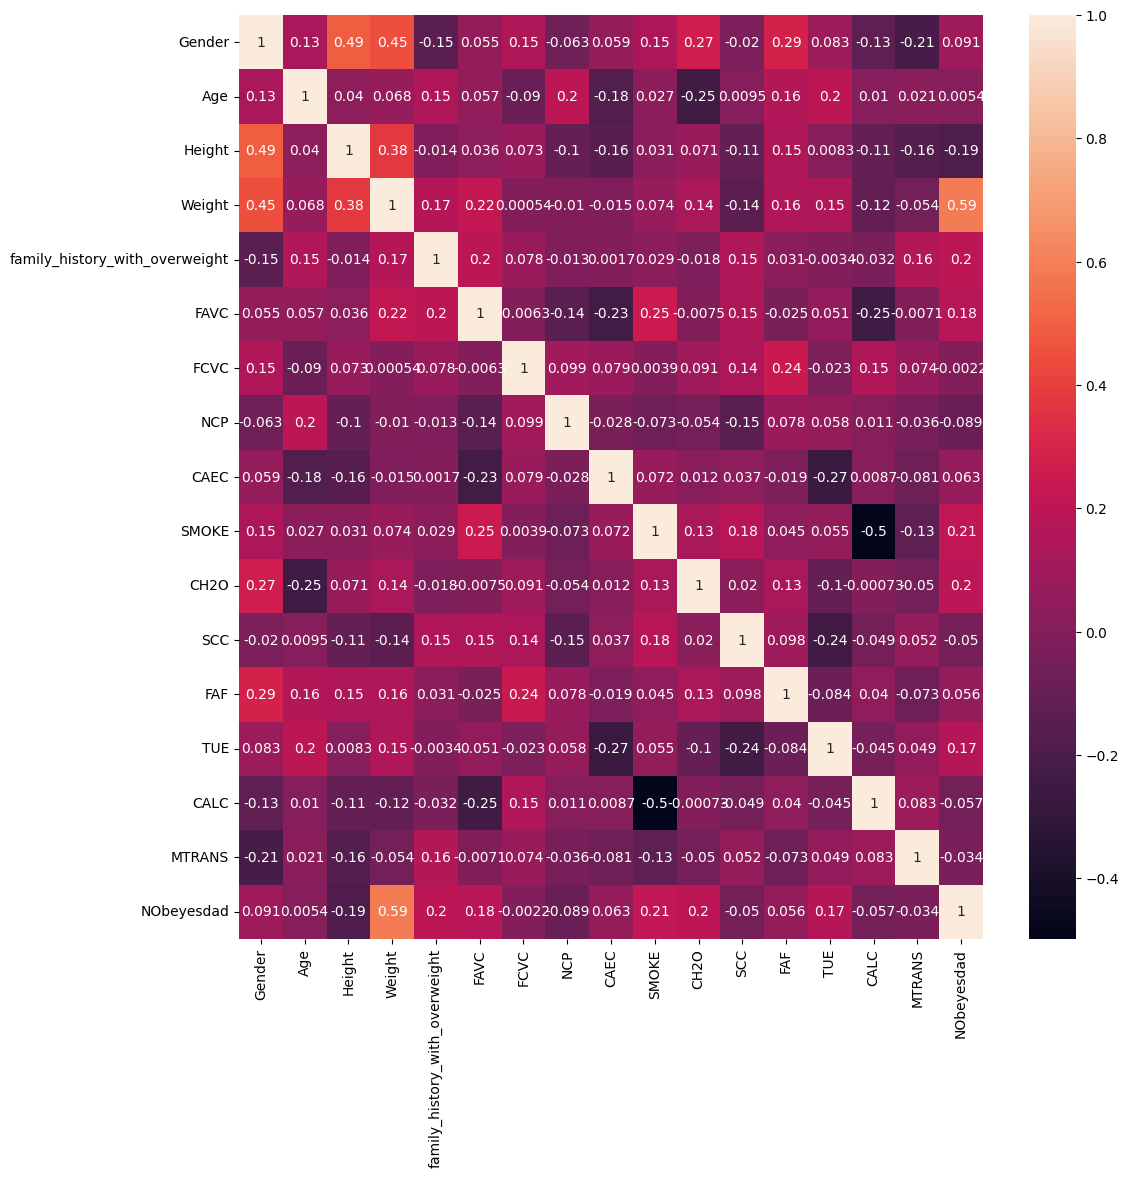

In [58]:
plt.figure(figsize=(12,12))
sns.heatmap(ap.corr(),annot=True)

In [59]:
X=ap.drop('NObeyesdad',axis=1)

In [60]:
Y=ap['NObeyesdad']

In [61]:
X

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,22.0,1.767840,64.0,0,0,3,4,2,0,4.00,0,6,8.0,2,3
1,1,21.0,1.737360,80.0,1,0,4,3,2,0,5.00,0,5,10.0,2,3
2,1,69.0,1.688592,69.0,1,1,1,4,0,0,1.00,0,7,14.0,2,4
3,1,22.0,1.737360,68.0,0,1,1,2,2,1,3.75,0,4,4.0,1,0
4,1,21.0,1.737360,64.5,0,0,3,4,2,0,3.00,0,7,14.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,1,21.0,1.828800,74.0,0,0,2,3,2,0,2.00,0,7,2.0,2,1
138,0,20.0,1.554480,55.0,0,0,4,3,2,0,3.00,0,4,2.0,2,4
139,1,20.0,1.645920,50.0,1,0,2,3,2,0,5.00,0,1,3.0,2,4
140,1,19.0,1.557528,72.0,0,0,2,2,2,0,5.00,0,7,4.0,2,3


In [62]:
Y

0      1
1      4
2      1
3      1
4      1
      ..
137    1
138    1
139    0
140    5
141    2
Name: NObeyesdad, Length: 142, dtype: int32

# Srandardization and Normalization

In [63]:
from sklearn.preprocessing import MinMaxScaler
scalers=MinMaxScaler()
Xs=scalers.fit_transform(X)

In [64]:
Xs

array([[1.        , 0.08737864, 0.85      , ..., 0.53846154, 1.        ,
        0.75      ],
       [1.        , 0.06796117, 0.8       , ..., 0.69230769, 1.        ,
        0.75      ],
       [1.        , 1.        , 0.72      , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 0.04854369, 0.65      , ..., 0.15384615, 1.        ,
        1.        ],
       [1.        , 0.02912621, 0.505     , ..., 0.23076923, 1.        ,
        0.75      ],
       [0.        , 0.08737864, 0.55      , ..., 0.46153846, 1.        ,
        0.75      ]])

In [70]:
X_train,X_test,Y_train,Y_test=train_test_split(Xs,Y,test_size=0.3,random_state=75,stratify=Y)

In [71]:
X.shape,X_train.shape,X_test.shape

((142, 16), (99, 16), (43, 16))

In [72]:
Y.shape,Y_train.shape,Y_test.shape

((142,), (99,), (43,))

# Model Selection

Accuracy Comparison :-

Linear Discriminant Analysis:
trainAccuracy: 0.9899
testingAccuracy: 0.8605


Logistic Regression:
trainAccuracy: 0.6970
testingAccuracy: 0.7209


Naive Bayes:
trainAccuracy: 0.3838
testingAccuracy: 0.1860


Support Vector Machine:
trainAccuracy: 0.6465
testingAccuracy: 0.6279


K-Nearest Neighbors:
trainAccuracy: 0.6566
testingAccuracy: 0.5581


Decision Tree:
trainAccuracy: 1.0000
testingAccuracy: 0.6977


Random Forest:
trainAccuracy: 1.0000
testingAccuracy: 0.7442


Bagging:
trainAccuracy: 1.0000
testingAccuracy: 0.7442


AdaBoost:
trainAccuracy: 0.7273
testingAccuracy: 0.7209


Gradient Boosting:
trainAccuracy: 1.0000
testingAccuracy: 0.9070


Extra Trees:
trainAccuracy: 1.0000
testingAccuracy: 0.5814




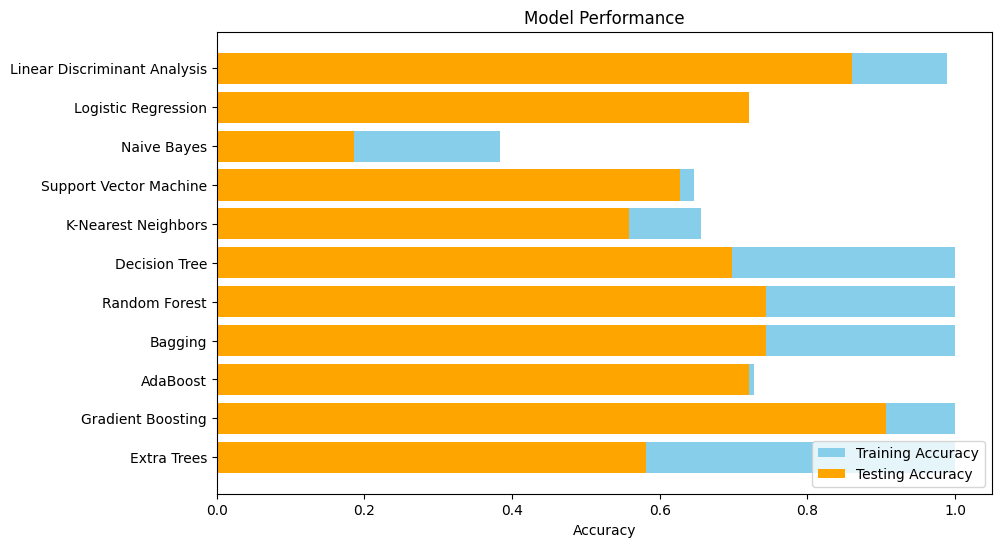

In [73]:
#USE DIFFERENT DIFFERNT MODEL TO CHECK THE ACCURACY(TRAINING AND TESTING ACCURACY).
#I WILL USE ONLY THOSE MODEL FOR FURTHER STEP(TRAINING STAGE)WHICH GIVE PROPER VALUE OF ACCURACY
#BECAUSE THE MODEL WHICH GIVE PROPER ACCURACY CAN PREDICT THE RESULT IN BETTER WAY
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
results=[]
names=[]
# create instances of all models
models = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}
from sklearn.metrics import accuracy_score
# Training accuracies
train_accuracies = []
test_accuracies = []
print('Accuracy Comparison :-\n')
for name, model in models.items():
    model.fit(X_train, Y_train)
    # Training accuracy
    X_train_prediction = model.predict(X_train)
    train_accuracy = accuracy_score(X_train_prediction, Y_train)
    train_accuracies.append(train_accuracy)
    
    # Testing accuracy
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, y_pred)
    test_accuracies.append(test_accuracy)
    print(f'{name}:')
    print(f'trainAccuracy: {train_accuracy:.4f}')
    print(f'testingAccuracy: {test_accuracy:.4f}')
    print('\n')

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(list(models.keys()), train_accuracies, color='skyblue', label='Training Accuracy')
plt.barh(list(models.keys()), test_accuracies, color='orange', label='Testing Accuracy')
plt.xlabel('Accuracy')
plt.title('Model Performance')
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis to have the model names at the top
plt.show()

# 

In [ ]:
ap.head()

In [ ]:
X.head()

In [ ]:
data.head()

In [ ]:
test = pd.read_csv("Obesity Survey (Responses).csv")

In [ ]:
test.head()